<a href="https://colab.research.google.com/github/pskaranth/EDA_PySpark/blob/main/EDA_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and Task

Data is from Kaggle website : https://www.kaggle.com/c/home-data-for-ml-course/data

Task :
Exploratory Data analysis using Pyspark.


In [1]:
# Install Pyspark & Setup Java Environment

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://www-us.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz  
!tar xf  spark-3.0.3-bin-hadoop3.2.tgz  
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions as F
# from pyspark.sql.functions import lit, desc, col, size, array_contains\
# , isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

import numpy as np





In [3]:
# Initialize a spark session.
spark = SparkSession.builder.master("local[*]").appName("EDA using spark").getOrCreate()

In [4]:
%cd /content/drive/MyDrive/Kaggle/EDA_Pyspark

/content/drive/MyDrive/Kaggle/EDA_Pyspark


In [5]:
!ls

EDA-PySpark.ipynb  test.csv  train.csv


In [126]:
train_df = spark.read.csv("/content/drive/MyDrive/Kaggle/EDA_Pyspark/train.csv", header = 'True', inferSchema='True',nanValue='NA') #if not for inferSchema, all dtype will be string.
# Had to specify nanValue='NA' as the datatype would be interpreted as string instead of int/double
train_df.head()

Row(Id=1, MSSubClass=60, MSZoning='RL', LotFrontage=65.0, LotArea=8450, Street='Pave', Alley='NA', LotShape='Reg', LandContour='Lvl', Utilities='AllPub', LotConfig='Inside', LandSlope='Gtl', Neighborhood='CollgCr', Condition1='Norm', Condition2='Norm', BldgType='1Fam', HouseStyle='2Story', OverallQual=7, OverallCond=5, YearBuilt=2003, YearRemodAdd=2003, RoofStyle='Gable', RoofMatl='CompShg', Exterior1st='VinylSd', Exterior2nd='VinylSd', MasVnrType='BrkFace', MasVnrArea=196.0, ExterQual='Gd', ExterCond='TA', Foundation='PConc', BsmtQual='Gd', BsmtCond='TA', BsmtExposure='No', BsmtFinType1='GLQ', BsmtFinSF1=706, BsmtFinType2='Unf', BsmtFinSF2=0, BsmtUnfSF=150, TotalBsmtSF=856, Heating='GasA', HeatingQC='Ex', CentralAir='Y', Electrical='SBrkr', 1stFlrSF=856, 2ndFlrSF=854, LowQualFinSF=0, GrLivArea=1710, BsmtFullBath=1, BsmtHalfBath=0, FullBath=2, HalfBath=1, BedroomAbvGr=3, KitchenAbvGr=1, KitchenQual='Gd', TotRmsAbvGrd=8, Functional='Typ', Fireplaces=0, FireplaceQu='NA', GarageType='Attc

In [107]:
train_df.dtypes #train_df.printSchema() #prints the tree structure of the schema 

[('Id', 'int'),
 ('MSSubClass', 'int'),
 ('MSZoning', 'string'),
 ('LotFrontage', 'double'),
 ('LotArea', 'int'),
 ('Street', 'string'),
 ('Alley', 'string'),
 ('LotShape', 'string'),
 ('LandContour', 'string'),
 ('Utilities', 'string'),
 ('LotConfig', 'string'),
 ('LandSlope', 'string'),
 ('Neighborhood', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('BldgType', 'string'),
 ('HouseStyle', 'string'),
 ('OverallQual', 'int'),
 ('OverallCond', 'int'),
 ('YearBuilt', 'int'),
 ('YearRemodAdd', 'int'),
 ('RoofStyle', 'string'),
 ('RoofMatl', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('MasVnrType', 'string'),
 ('MasVnrArea', 'double'),
 ('ExterQual', 'string'),
 ('ExterCond', 'string'),
 ('Foundation', 'string'),
 ('BsmtQual', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinSF1', 'int'),
 ('BsmtFinType2', 'string'),
 ('BsmtFinSF2', 'int'),
 ('BsmtUnfSF', 'int'),
 ('TotalBsmtSF', 'int'),
 ('

In [8]:
print(type(train_df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [108]:
train_df.count() #Returns the number of rows

1460

In [109]:
train_df.show() # shows 20 rows by default
#train_df.toPandas().head() # convert to pandas dataframe and use head()

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

In [11]:
# from pyspark.sql.functions import isnan, when, count, col

# # train_df.select([count(when(col(c).isnan(), c)).alias(c) for c in train_df.columns]).show()

# for col in train_df.columns:
#    print(col, 'with null values: ', train_df.filter(train_df[col].isNull()).count())



#### Select - selects only those columns mentioned in the clause.

In [110]:
train_df.select("LotArea","1stFlrSF","TotalBsmtSF","SalePrice").show(5)  


+-------+--------+-----------+---------+
|LotArea|1stFlrSF|TotalBsmtSF|SalePrice|
+-------+--------+-----------+---------+
|   8450|     856|        856|   208500|
|   9600|    1262|       1262|   181500|
|  11250|     920|        920|   223500|
|   9550|     961|        756|   140000|
|  14260|    1145|       1145|   250000|
+-------+--------+-----------+---------+
only showing top 5 rows



#### Where clause - Used for filtering rows on a condition

In [111]:
tdf = train_df.where(train_df['LotConfig'] =='Inside') 
tdf.show(5)

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

#### Groupby 

In [112]:
train_df.groupBy("LotConfig").count().show() #in Pandas - df.groupby("LotConfig").agg({'LotConfig':['count']}) #df.groupby(['LotConfig']).size()

+---------+-----+
|LotConfig|count|
+---------+-----+
|   Inside| 1052|
|      FR3|    4|
|   Corner|  263|
|  CulDSac|   94|
|      FR2|   47|
+---------+-----+



#### Distinct

In [113]:
train_df.select('LotConfig').distinct().rdd.map(lambda r: r[0]).collect()

['Inside', 'FR3', 'Corner', 'CulDSac', 'FR2']

In [114]:
 print(dict(train_df.dtypes)['LotFrontage'])

double


In [115]:
numeric_col =[numeric_col for numeric_col, t in train_df.dtypes if t in['int','double']]
numeric_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

#### Zero/ missing values in numeric columns

In [127]:
from pyspark.sql.functions import col,isnan

for index, col_n in enumerate(train_df.columns):
  if col_n in numeric_col:        
      print(col_n , 'with zero or missing values', train_df.where(col(col_n).isin([0,None,np.nan])).count()) 

Id with zero or missing values 0
MSSubClass with zero or missing values 0
LotFrontage with zero or missing values 259
LotArea with zero or missing values 0
OverallQual with zero or missing values 0
OverallCond with zero or missing values 0
YearBuilt with zero or missing values 0
YearRemodAdd with zero or missing values 0
MasVnrArea with zero or missing values 869
BsmtFinSF1 with zero or missing values 467
BsmtFinSF2 with zero or missing values 1293
BsmtUnfSF with zero or missing values 118
TotalBsmtSF with zero or missing values 37
1stFlrSF with zero or missing values 0
2ndFlrSF with zero or missing values 829
LowQualFinSF with zero or missing values 1434
GrLivArea with zero or missing values 0
BsmtFullBath with zero or missing values 856
BsmtHalfBath with zero or missing values 1378
FullBath with zero or missing values 9
HalfBath with zero or missing values 913
BedroomAbvGr with zero or missing values 6
KitchenAbvGr with zero or missing values 1
TotRmsAbvGrd with zero or missing value

In [128]:
string_col = [string_col for string_col,t in train_df.dtypes if t =='string' ]
string_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### Missing values in string columns 

In [129]:
from pyspark.sql.functions import col,isnan

for index, col_s in enumerate(train_df.columns):
  if col_s in string_col:
          # print(x)
      print(col_s , 'with missing values',train_df.filter(col(col_s).eqNullSafe(None) | col(col_s).isNull() | col(col_s).eqNullSafe('NA')).count())  # missing values- NA/None/Null

MSZoning with missing values 0
Street with missing values 0
Alley with missing values 1369
LotShape with missing values 0
LandContour with missing values 0
Utilities with missing values 0
LotConfig with missing values 0
LandSlope with missing values 0
Neighborhood with missing values 0
Condition1 with missing values 0
Condition2 with missing values 0
BldgType with missing values 0
HouseStyle with missing values 0
RoofStyle with missing values 0
RoofMatl with missing values 0
Exterior1st with missing values 0
Exterior2nd with missing values 0
MasVnrType with missing values 8
ExterQual with missing values 0
ExterCond with missing values 0
Foundation with missing values 0
BsmtQual with missing values 37
BsmtCond with missing values 37
BsmtExposure with missing values 38
BsmtFinType1 with missing values 37
BsmtFinType2 with missing values 38
Heating with missing values 0
HeatingQC with missing values 0
CentralAir with missing values 0
Electrical with missing values 1
KitchenQual with missi

In [136]:
train_df = train_df.na.fill({'LotFrontage' : 0}) #without this, mean returns NaN
train_df = train_df.na.fill(0)  # only fills all integer np.nan columns with the value 0

# can use imputer to fill all the nan values with mean instead of 0


In [130]:
print(train_df.where(train_df['LotFrontage'] ==np.nan).show(5) ) #
train_df.where(train_df['Alley'] =='NA').show(5)

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

In [131]:
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import col

tdf = train_df.select(*(col(c).cast("float").alias(c) for c in numeric_col))

print(tdf.dtypes)


imputer = Imputer(
    inputCols=tdf.columns, 
    outputCols=["{}_imputed".format(c) for c in tdf.columns],
    missingValue = np.nan
    
    ).setStrategy("mean")

# Add imputation cols to df
tdf = imputer.fit(tdf).transform(tdf)


[('Id', 'float'), ('MSSubClass', 'float'), ('LotFrontage', 'float'), ('LotArea', 'float'), ('OverallQual', 'float'), ('OverallCond', 'float'), ('YearBuilt', 'float'), ('YearRemodAdd', 'float'), ('MasVnrArea', 'float'), ('BsmtFinSF1', 'float'), ('BsmtFinSF2', 'float'), ('BsmtUnfSF', 'float'), ('TotalBsmtSF', 'float'), ('1stFlrSF', 'float'), ('2ndFlrSF', 'float'), ('LowQualFinSF', 'float'), ('GrLivArea', 'float'), ('BsmtFullBath', 'float'), ('BsmtHalfBath', 'float'), ('FullBath', 'float'), ('HalfBath', 'float'), ('BedroomAbvGr', 'float'), ('KitchenAbvGr', 'float'), ('TotRmsAbvGrd', 'float'), ('Fireplaces', 'float'), ('GarageYrBlt', 'float'), ('GarageCars', 'float'), ('GarageArea', 'float'), ('WoodDeckSF', 'float'), ('OpenPorchSF', 'float'), ('EnclosedPorch', 'float'), ('3SsnPorch', 'float'), ('ScreenPorch', 'float'), ('PoolArea', 'float'), ('MiscVal', 'float'), ('MoSold', 'float'), ('YrSold', 'float'), ('SalePrice', 'float')]


In [132]:
tdf.select('LotFrontage','LotFrontage_imputed').where(tdf['LotFrontage'] ==np.nan).show(5)  # check the column LotFrontage_imputed for the out column      
      

+-----------+-------------------+
|LotFrontage|LotFrontage_imputed|
+-----------+-------------------+
|        NaN|           70.04996|
|        NaN|           70.04996|
|        NaN|           70.04996|
|        NaN|           70.04996|
|        NaN|           70.04996|
+-----------+-------------------+
only showing top 5 rows



#### Stat functions (Mean, Standard deviation)

In [133]:
from pyspark.sql.functions import mean , stddev , col

print(train_df.agg({'SalePrice': 'mean'}).show()) #df['LotFrontage'].mean() in Pandas df.


df_stats = train_df.select(mean(col('SalePrice')).alias('mean'),
                           stddev(col('SalePrice')).alias('std')
).collect()

print(df_stats)

print(train_df[numeric_col].describe().show()) #list of stat functions.




+------------------+
|    avg(SalePrice)|
+------------------+
|180921.19589041095|
+------------------+

None
[Row(mean=180921.19589041095, std=79442.50288288663)]
+-------+-----------------+------------------+-----------+------------------+------------------+------------------+------------------+------------------+----------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-------------------+--------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+-----------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|               Id|        MSSubClass|LotFrontage|           LotArea|       OverallQual|       OverallCond|         YearBu

#### Create new columns and drop

In [134]:
train_df = train_df.withColumn('TotBathAbvGrade',train_df["FullBath"] + (0.5 * train_df["HalfBath"]))
train_df = train_df.withColumn('TotBsmtBath', train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]))


# in Pandas df["TotBathAbvGrade"] = df["FullBath"] + (0.5 * df["HalfBath"])
# 'DataFrame' object does not support item assignment as it is immutable

# Remove columns
to_remove = ["FullBath","HalfBath","BsmtFullBath", "BsmtHalfBath"]

for col in to_remove:
    train_df = train_df.drop(col)
    numeric_col.remove(col)

train_df.show(5)

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+---------------+-----------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition2|BldgType|House

#### Correlation

In [137]:
# reference : https://stackoverflow.com/questions/55546467/how-to-plot-correlation-heatmap-when-using-pysparkdatabricks
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numeric_col, outputCol=vector_col)

myGraph_vector = assembler.transform(train_df).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col)

corr_matrix = matrix.collect()[0]["pearson({})".format(vector_col)].values 
corr_matrix


array([ 1.        ,  0.01115648, -0.01976132, ...,  0.04643225,
       -0.02892259,  1.        ])

In [ ]:
# corr_df = pd.DataFrame(corr_matrix.reshape(-1, len(numeric_col)), columns=numeric_col, index=numeric_col)
# len(numeric_col)


34

(1156,) corr_matrix.shape
 (34, 34) corr_matrix reshape


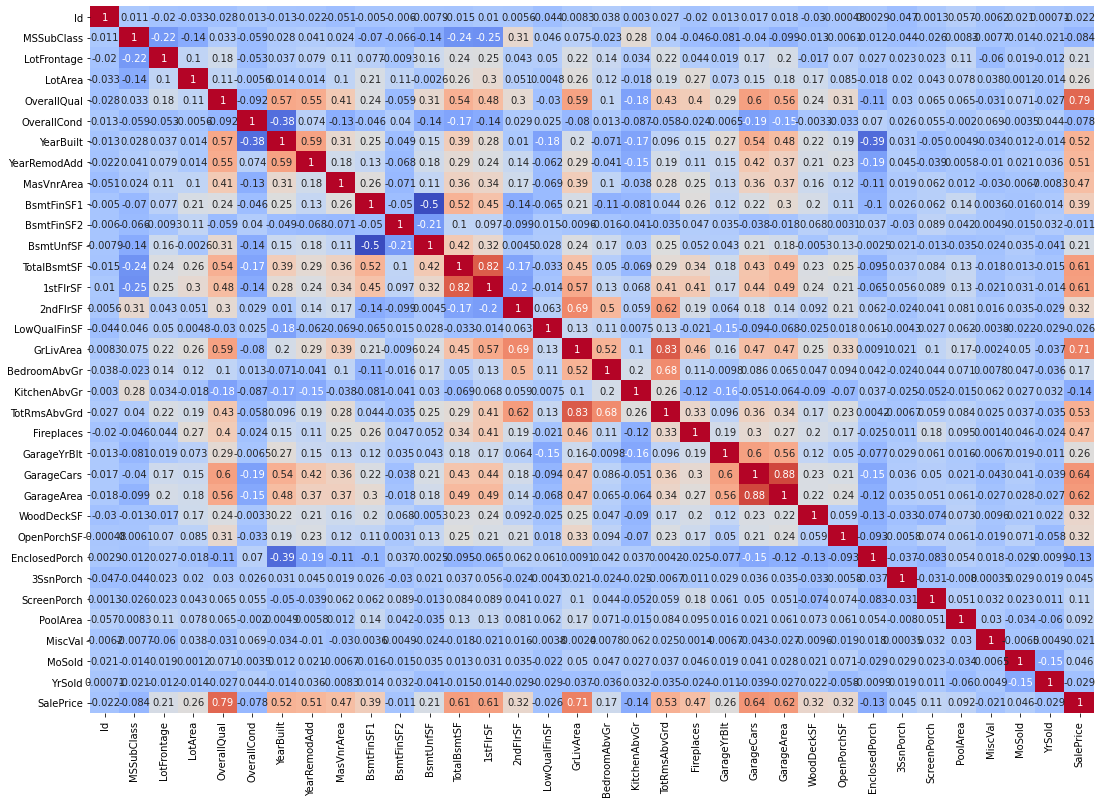

In [139]:
import seaborn as sns
print(corr_matrix.shape,'corr_matrix.shape\n' ,corr_matrix.reshape(-1, len(numeric_col)).shape , 'corr_matrix reshape')
plt.figure(figsize=(18,13))
sns.heatmap(corr_matrix.reshape(-1, len(numeric_col)), annot=True, cbar=False, cmap='coolwarm', xticklabels=numeric_col, yticklabels=numeric_col);

#### Pandas

In [95]:
import pandas as pd

df = pd.read_csv('train.csv')

In [ ]:
# df.groupby(['BedroomAbvGr']).agg({'BedroomAbvGr':['mean','count']}) # numeric column for the mean

BedroomAbvGr      
                     mean count
BedroomAbvGr                   
0                       0     6
1                       1    50
2                       2   358
3                       3   804
4                       4   213
5                       5    21
6                       6     7
8                       8     1

In [ ]:
print(df.groupby("LotConfig").agg({'LotFrontage':['count','mean']}))

          LotFrontage           
                count       mean
LotConfig                       
Corner            201  84.039801
CulDSac            45  59.911111
FR2                33  63.515152
FR3                 4  70.750000
Inside            918  67.715686


In [ ]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   6965


In [ ]:
chk =  pd.isnull(df["LotFrontage"]) 
df[chk]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,...,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,...,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,...,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,...,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,...,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,...,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,...,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,9

In [97]:
numeric_cols = [cols for cols in df.columns if df[cols].dtype in ['int64', 'float64']]
numeric_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
 df[numeric_cols].isnull().sum() 
 

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [ ]:
print(df.dtypes)

dfd Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [ ]:
df["TotBathAbvGrade"] = df["FullBath"] + (0.5 * df["HalfBath"])

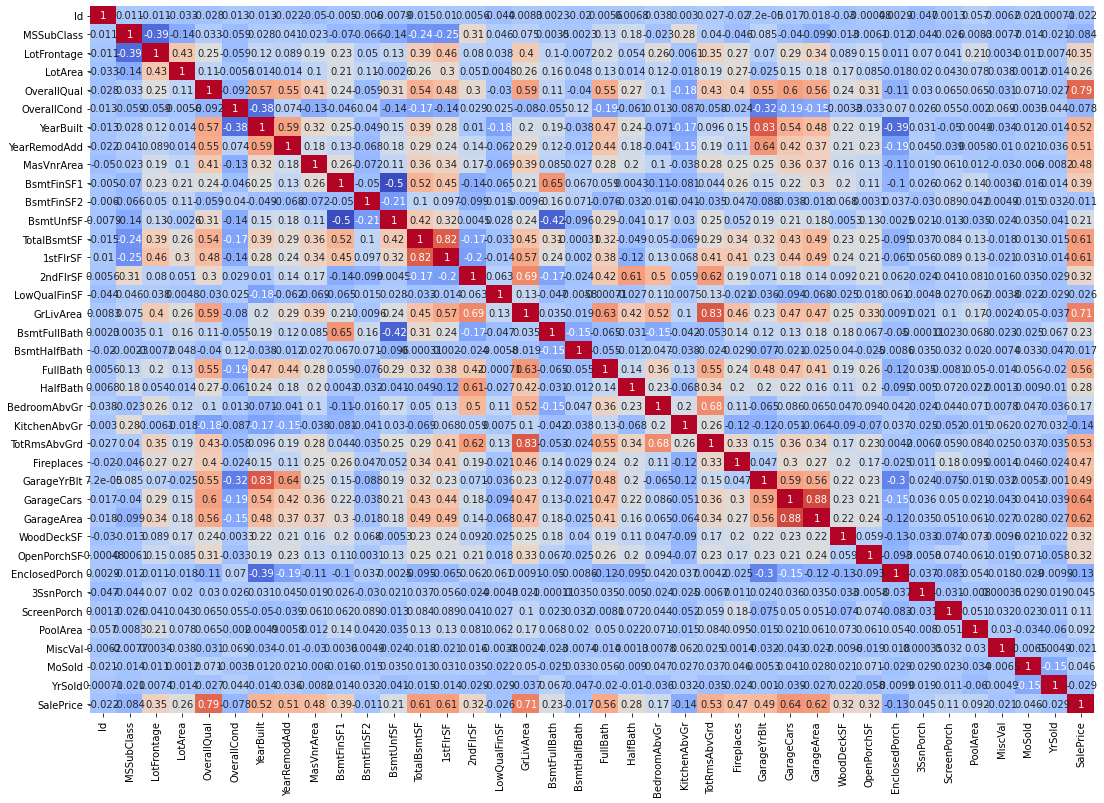

In [ ]:
corr_matrix_df = df[numeric_cols].corr()
plt.figure(figsize=(18,13))
sns.heatmap(corr_matrix.T, annot=True, cbar=False, cmap='coolwarm');

In [98]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df[numeric_cols])
df[numeric_cols] = imp.transform(df[numeric_cols])